In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (7, 3.5)
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
measurement_rate = 10
phase_raw = np.fromfile('/tmp/unwrapped_phase', 'uint8').reshape(-1, 12)
phase_int = phase_raw[:, :8].view('int64').ravel()
phase_frac = phase_raw[:, -4:].view('float32').ravel()
phase = phase_int + phase_frac / (2*np.pi)

In [3]:
T_meas = 10  # 10 second Doppler averaging
N_meas = T_meas * measurement_rate
phase_int_diff = np.diff(phase_int[::N_meas])
phase_frac_diff = np.diff(phase_frac[::N_meas])
phase_diff = phase_int_diff.astype('float') + phase_frac_diff.astype('float') / (2 * np.pi)
freq_offset = 11e3
freq = phase_diff / T_meas + freq_offset
time = np.arange(freq.size) * T_meas

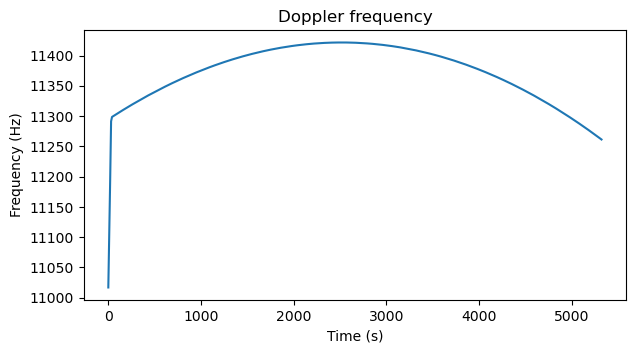

In [4]:
plt.plot(time, freq)
plt.title('Doppler frequency')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)');

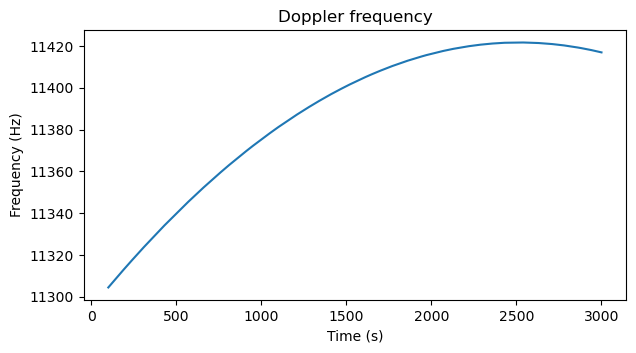

In [5]:
sel = (time >= 100) & (time <= 3000)
plt.plot(time[sel], freq[sel])
plt.title('Doppler frequency')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)');

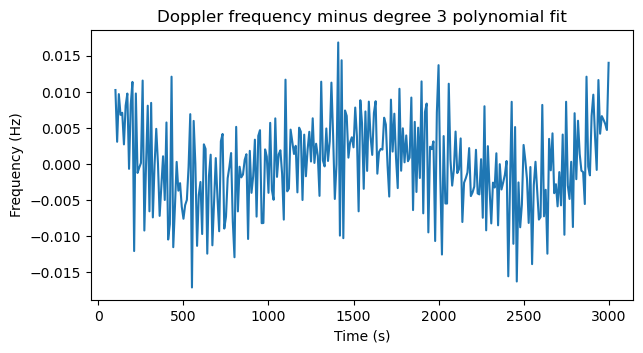

In [6]:
deg_fit = 3
p = np.polyfit(np.arange(freq[sel].size), freq[sel], deg_fit)
fit = np.polyval(p, np.arange(freq[sel].size))
plt.plot(time[sel], freq[sel] - fit)
plt.title(f'Doppler frequency minus degree {deg_fit} polynomial fit')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)');